**Requirements**
* Number of samples > 1000
* File type: CSV, Images, Video, Text, Speech, Time Series
* Problem type: Classification, Regression, ...
* None Type: Should select datasets containing NoneData

**Project Registration**
* Problem Description: Rain prediction in Australia
* Dataset's Name: weatherAUS.csv
* Dataset's link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


**IMP Programming**
* Name: Nguyễn Quỳnh Anh Phương
* Student's ID: 2192014

The dataset contains about 10 years of daily weather observations from nay locations across Australia. 
The purpose is to predict next-day rain by training classification models on the target locations across Australia.
RainTomorrow is the target variable to predict. This column is Yes if the rain for that day was >= 1mm
- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall: The amount of rainfall recoreded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed(km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am

In [58]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

In [59]:
#https://drive.google.com/file/d/1FOimDZhl6UIDBLIcbJoYTwkV2KZVoivY/view?usp=sharing
!gdown 1FOimDZhl6UIDBLIcbJoYTwkV2KZVoivY

Downloading...
From: https://drive.google.com/uc?id=1FOimDZhl6UIDBLIcbJoYTwkV2KZVoivY
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 176MB/s]


In [60]:
rain=pd.read_csv('weatherAUS.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [61]:
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [62]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

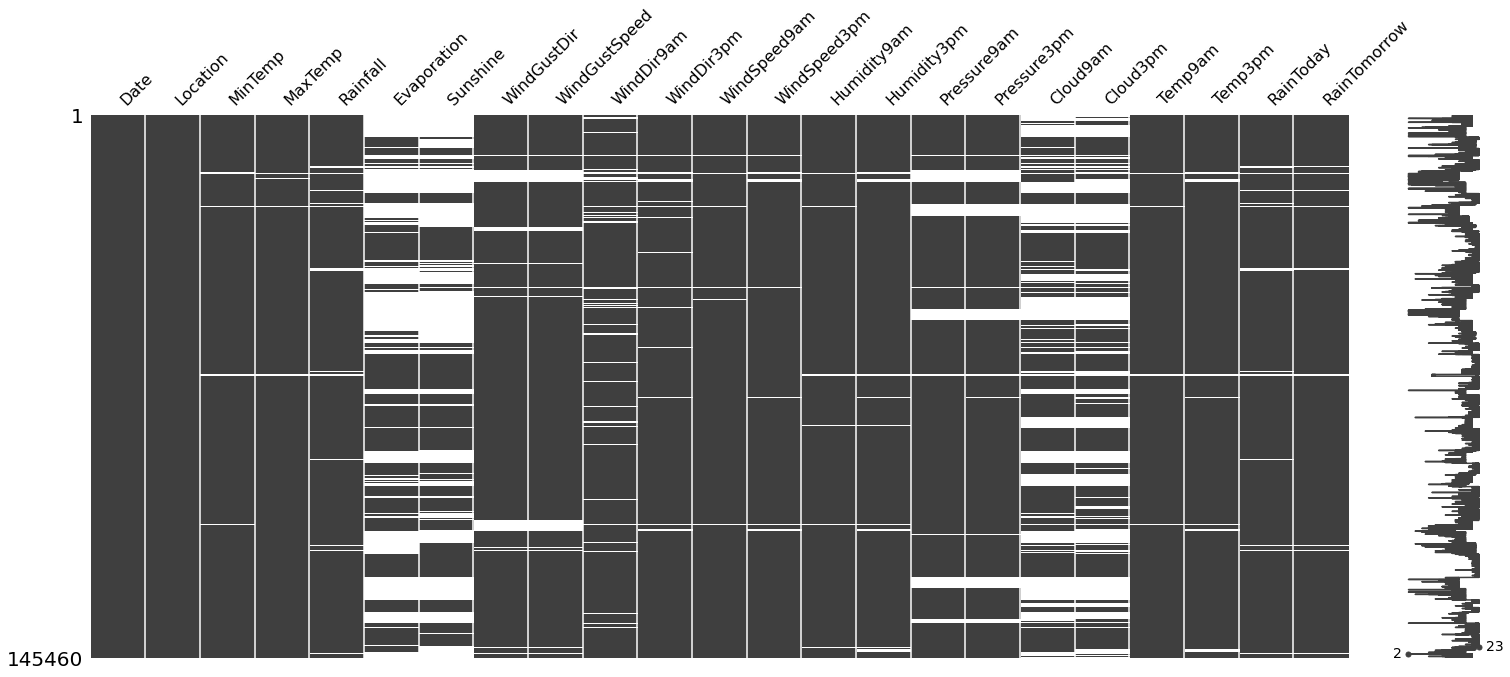

In [63]:
#Visualize missing values (NaN) values using Missingno Library
msno.matrix(rain)

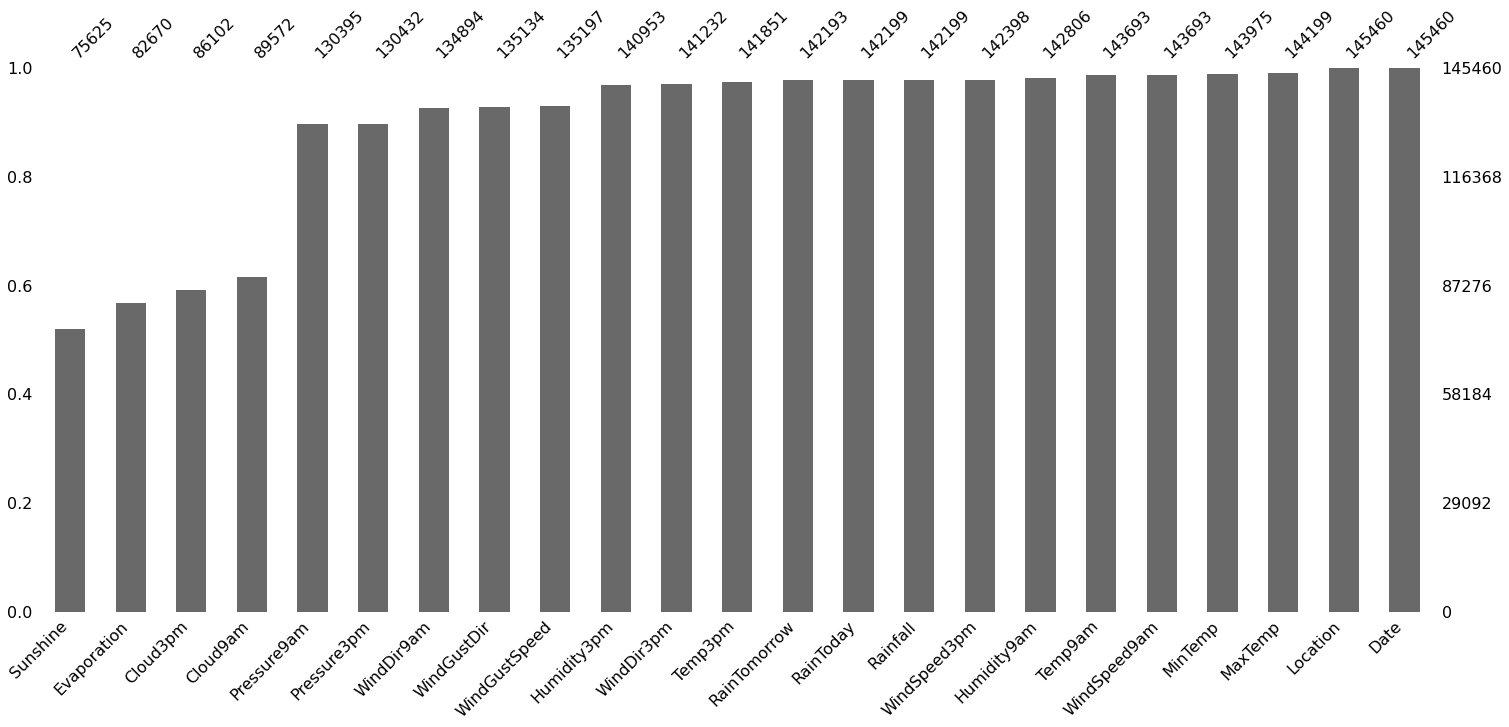

In [64]:
msno.bar(rain, sort = 'ascending')


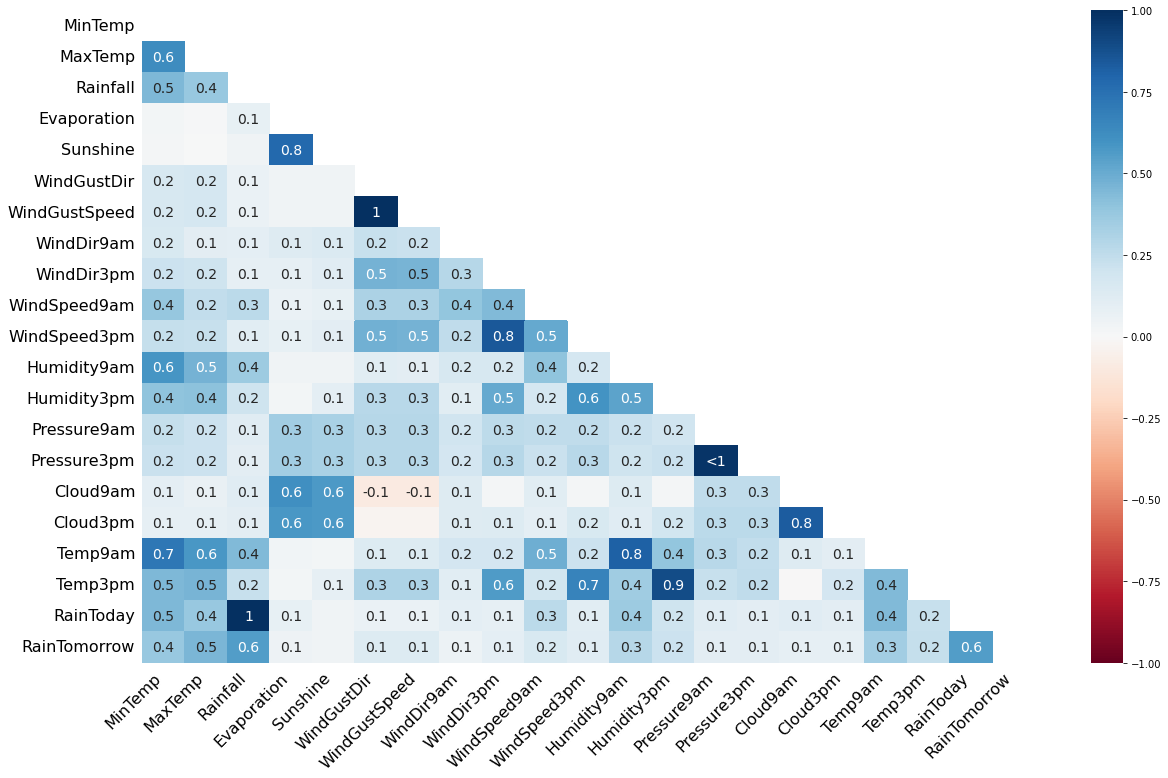

In [65]:
msno.heatmap(rain)

The above graphs show that the number of misssing values are high in: Evaporation, Sunshine, Cloud3pm and Cloud9am

AttributeError: ignored

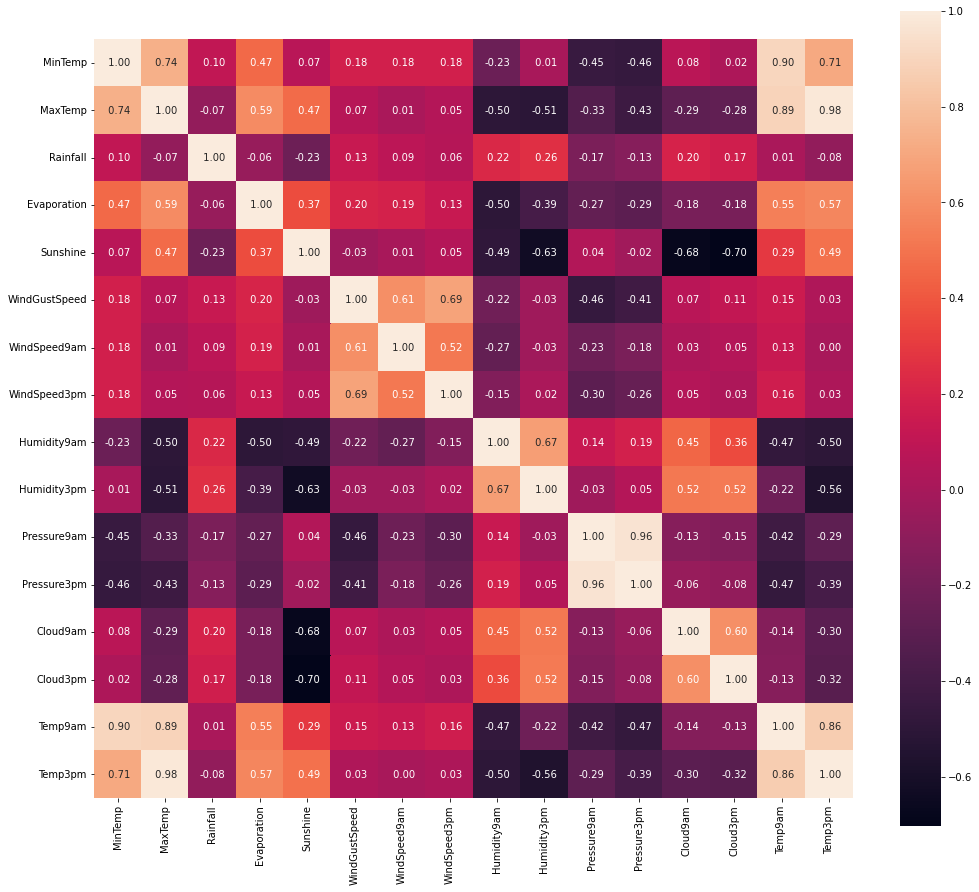

In [66]:
plt.figure(figsize = (17,15))
ax = sns.heatmap(rain.corr(), square = True, annot = True, fmt = ' .2f')
ax.set_xticklabels(ax.get_xticklables(), rotation = 90)
plt.show()

In [68]:
#Data preparation before
#Finding all the categorical and continuous values
categorical_col, contin_val=[],[]
for i in rain.columns:
  if rain[i].dtype == 'object':
    categorical_col.append(i)
  else:
    contin_val.append(i)
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [69]:
#Changing Yes and No to 1 and 0 in some columns
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})
print(rain.RainToday)
print(rain.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


In [70]:
#Checking percentage of missing data in every column
(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [71]:
#Filling the missing values for continuous variables with mean
rain['MinTemp'] = rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp'] = rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall'] = rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation'] = rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine'] = rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [72]:
#Filling the misssing values for continuous variables yes and no (0 and 1) with mode (most frequently occur values)
rain['RainToday'] = rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow'] = rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [73]:
#Checking percentage of missing data in every column
(rain.isnull().sum()/len(rain))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

# **Data Visualization**

0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


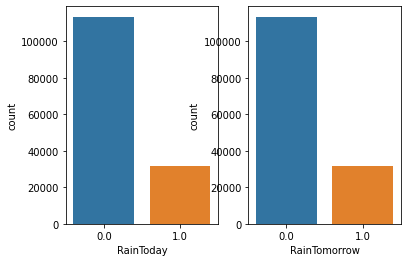

<Figure size 1440x1440 with 0 Axes>

In [74]:
#Count of rain today and tomorrow
fig, ax = plt.subplots(1,2)
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

plt.figure(figsize = (20,20))
sns.countplot(data = rain, x = 'RainToday', ax = ax[0])
sns.countplot(data = rain, x = 'RainTomorrow', ax = ax[1])

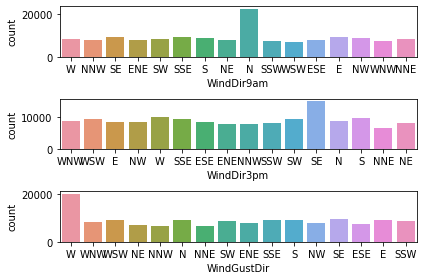

<Figure size 720x720 with 0 Axes>

In [75]:
#Direction of wind at 9am, 3pm
fig, ax = plt.subplots(3, 1)
plt.figure(figsize = (10,10))

sns.countplot(data = rain, x = 'WindDir9am', ax = ax[0])
sns.countplot(data = rain, x = 'WindDir3pm', ax = ax[1])
sns.countplot(data = rain, x = 'WindGustDir', ax = ax[2])
fig.tight_layout()


As we can see, at 9am, it is highest for direction N. At 3pm, it is highest for direction SE.

In [76]:
#Dropping date column
rain = rain.iloc[:, 1:]
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0
145456,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0
145457,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0
145458,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0


In [77]:
#Encoding the categorical variables
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [78]:
rain.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
5,2,14.6,29.7,0.2,5.468232,7.611178,14,56.0,13,13,...,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0.0,0.0
6,2,14.3,25.0,0.0,5.468232,7.611178,13,50.0,12,13,...,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0.0,0.0
7,2,7.7,26.7,0.0,5.468232,7.611178,13,35.0,10,13,...,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0.0,0.0
8,2,9.7,31.9,0.0,5.468232,7.611178,6,80.0,9,7,...,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0.0,1.0
9,2,13.1,30.1,1.4,5.468232,7.611178,13,28.0,8,10,...,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1.0,0.0


In [79]:
#Removing the Outliers
print('DataFrame Shape before removing outliers', rain.shape)
rain = rain[(np.abs(stats.zscore(rain)) <3).all(axis =1)]
print('DataFrame Shape after removing outliers', rain.shape)

DataFrame Shape before removing outliers (145460, 22)
DataFrame Shape after removing outliers (136608, 22)


In [80]:
#Dropping highly correlated columns

In [81]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:, :-1], rain.iloc[:, -1], test_size = 0.2, random_state =42)

# **Training the models**

In [82]:
#Logistic Regression
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print("The accuracy of Logistic Regression is: ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is: ", f1_score(y_test, predicted,)*100, "%")


The accuracy of Logistic Regression is:  84.66803308688968 %

F1 score for logistic regression is:  54.183528382369026 %


In [83]:
#Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)
print("The accuracy of Gaussian Naive Bayes Model is: ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is: ", f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes Model is:  79.58421784642414 %

F1 score for Gaussian Naive Bayes is:  55.26864474739375 %


In [84]:
#Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("The accouracy of Gaussian Naive Bayes model is: ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Bernoulli Naive Bayes is: ", f1_score(y_test, predicted,)*100, "%")

The accouracy of Gaussian Naive Bayes model is:  76.98923944074372 %

F1 score for Bernoulli Naive Bayes is:  43.91114283165314 %


In [85]:
#Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state =0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Random Forest is: ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is:  85.87219090842545 %
